Nama : Irawansayh
Participant ID : 

Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Data Reading

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bike_sharing_daily_data.csv to bike_sharing_daily_data (5).csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily_data.csv']))

In [4]:
data.head()

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.columns

Index(['date', 'season', 'holiday', 'weekday', 'workingday', 'weather', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'trips'],
      dtype='object')

In [6]:
data.shape

(731, 13)

In [7]:
data.describe()

,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,trips
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Check Missing Values

In [8]:
data.isnull().sum()

date          0
season        0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
trips         0
dtype: int64

In [9]:
# convert the 'dteday' column to datetime format
data['date']= pd.to_datetime(data['date'])
 
# Check the format of 'dteday' column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   holiday     731 non-null    int64         
 3   weekday     731 non-null    int64         
 4   workingday  731 non-null    int64         
 5   weather     731 non-null    object        
 6   temp        731 non-null    float64       
 7   atemp       731 non-null    float64       
 8   hum         731 non-null    float64       
 9   windspeed   731 non-null    float64       
 10  casual      731 non-null    int64         
 11  registered  731 non-null    int64         
 12  trips       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 74.4+ KB


Take trips in 2020 only

In [10]:
new_data = data.loc[data['date'].dt.year==2020]
new_data.head(100)

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-05,Summer,0,3,1,Clear/Partly Cloudy,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,2020-04-06,Summer,0,4,1,Clear/Partly Cloudy,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,2020-04-07,Summer,0,5,1,Misty and Cloudy,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,2020-04-08,Summer,0,6,0,Misty and Cloudy,0.342500,0.341529,0.877500,0.133083,879,1576,2455


1. How was the daily trend of trips for the year 2020? Is there any popular day we see a spike?

In [11]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Date")
    plt.title("Daily trend of trips for the year 2020")
    plt.ylabel("Total Trips")
    plt.grid(True)

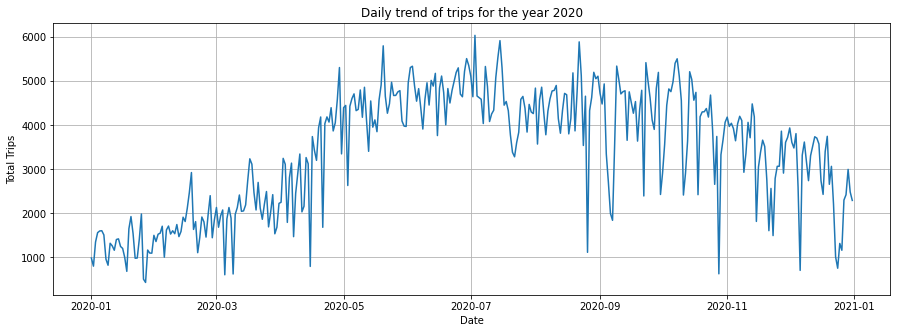

In [12]:
series = new_data['trips'].values
time = new_data['date'].values
plt.figure(figsize=(15, 5))
plot_series(time, series)

The daily trend of travel during 2020 experienced a spike from the five th month, namely May to the ten th month of October, then the daily trend of travel experienced a very significant decline.

2. How are holidays having an effect on the overall trip count?

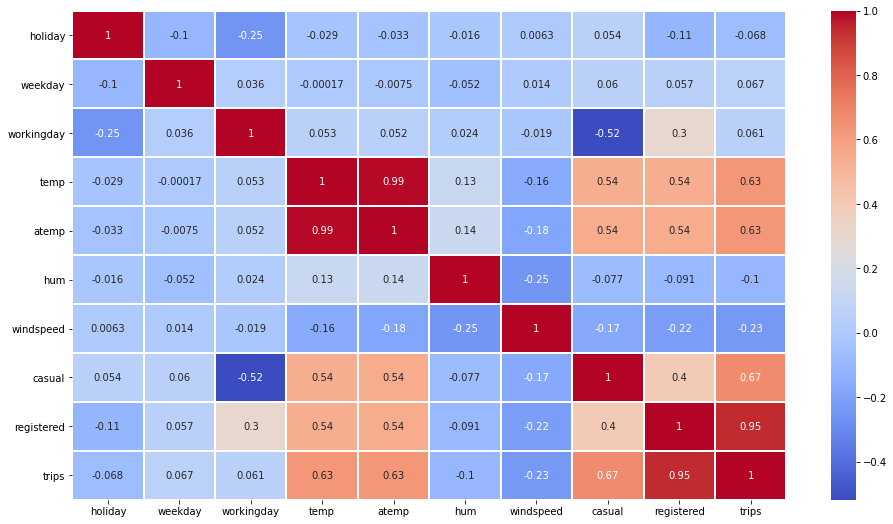

In [13]:
# create correlation matrix using heatmap
fig, ax = plt.subplots(figsize=(16,9)) # create figure with figsize in inches
sns.heatmap(data.corr(), cmap='coolwarm', annot=True, linewidths=1, ax=ax);

In [14]:
newdata = ['holiday', 'trips']
newdata1 = data[newdata]
newdata1.head()
newdata1

,holiday,trips
0,0,985
1,0,801
2,0,1349
3,0,1562
4,0,1600
...,...,...
726,0,2114
727,0,3095
728,0,1341
729,0,1796


<function matplotlib.pyplot.show>

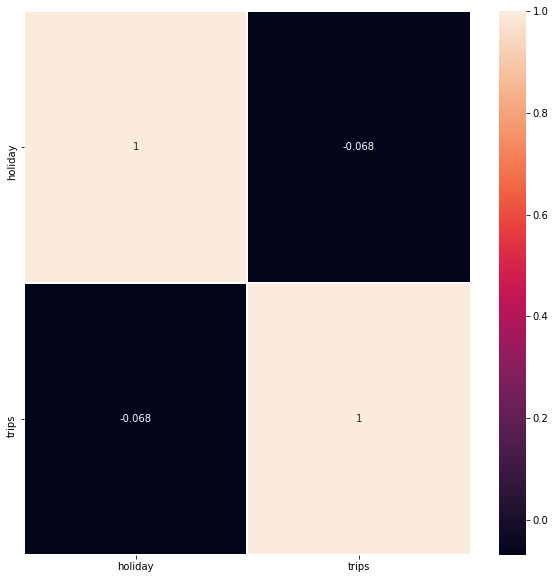

In [15]:
x , y = plt.subplots (figsize = (10,10))
sns.heatmap(newdata1.corr(),annot=True, linewidths=1)
plt.show

Based on the results of the plot that we made, the correlation obtained from the attribute with -0.068 is "holiday" and "trips". The results obtained are below 1 or even minus which means that there is no effect of vacation on the total number of trips

3. Does weather have an affect on the trip share count ?

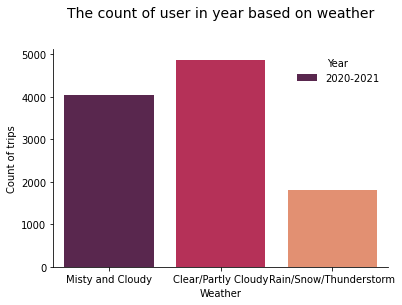

In [16]:
g4 = sns.barplot(data=data,x="weather",  y="trips", palette="rocket",  ci=None)
sns.despine(top=True, right=True, left=False, bottom=False) # remove border

plt.ylabel('Count of trips')
plt.xlabel('Weather')
plt.title("The count of user in year based on weather", size=14, y=1.12)

plt.legend(title='Year', loc='best', labels=['2020-2021'], frameon=False)
plt.show(g4);

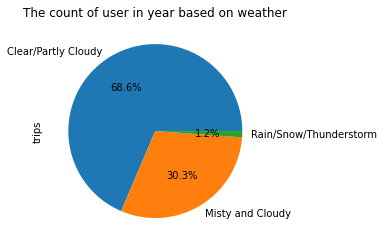

In [17]:
df=data.groupby('weather')['trips'].sum().to_frame()
# Create the pie chart
df.plot.pie( y = 'trips' , legend = False, autopct ='%.1f%%')
#Adding the aesthetics
plt.title('The count of user in year based on weather')
#Show the plot
plt.show()

Based on the results of the plot that we made using pie and also boxplot. Weather affects the number of trip shares, namely when the weather is clear/party cloudy, the number of trip shares is inversely proportional to the weather during rain/snow/thunderstorm

4. Is there a significant difference in the ridership trend based on the membership type i.e. casual member or registered member?

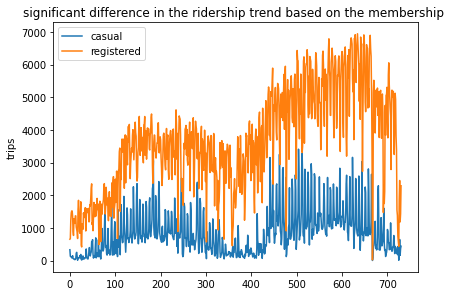

<Figure size 1152x1440 with 0 Axes>

In [18]:
data[['casual','registered']].plot()
plt.xlabel("")
plt.ylabel("trips")
plt.tight_layout()
plt.title("significant difference in the ridership trend based on the membership ")
plt.figure(figsize=(16, 20))
plt.show()

In [19]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Date")
    plt.title("significant difference in the ridership trend based on the membership ")
    plt.ylabel("Total Trips")
    plt.grid(True)

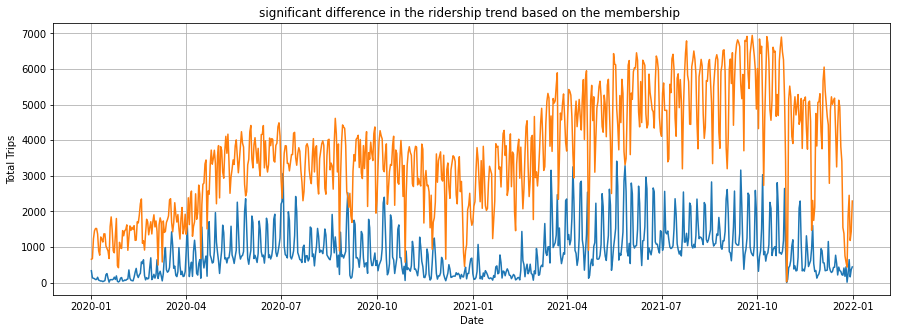

In [20]:
series = data[['casual','registered']].values
time = data['date'].values
plt.figure(figsize=(15, 5))
plt.tight_layout()
plot_series(time, series)

Based on the results of our plots, there are significant differences in driving trends by type of membership, namely casual members or registered members developing over time. In January there were very few casual member, and where the proportion compared to registered users was also very low. 

In [21]:
data.head(100)

,date,season,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,trips
0,2020-01-01,Spring,0,6,0,Misty and Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2020-01-02,Spring,0,0,0,Misty and Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2020-01-03,Spring,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2020-01-04,Spring,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2020-01-05,Spring,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-05,Summer,0,3,1,Clear/Partly Cloudy,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,2020-04-06,Summer,0,4,1,Clear/Partly Cloudy,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,2020-04-07,Summer,0,5,1,Misty and Cloudy,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,2020-04-08,Summer,0,6,0,Misty and Cloudy,0.342500,0.341529,0.877500,0.133083,879,1576,2455


In [22]:
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', \
3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
data['weekday'] = data['weekday'].apply(lambda x: weekday_mapping[x])

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


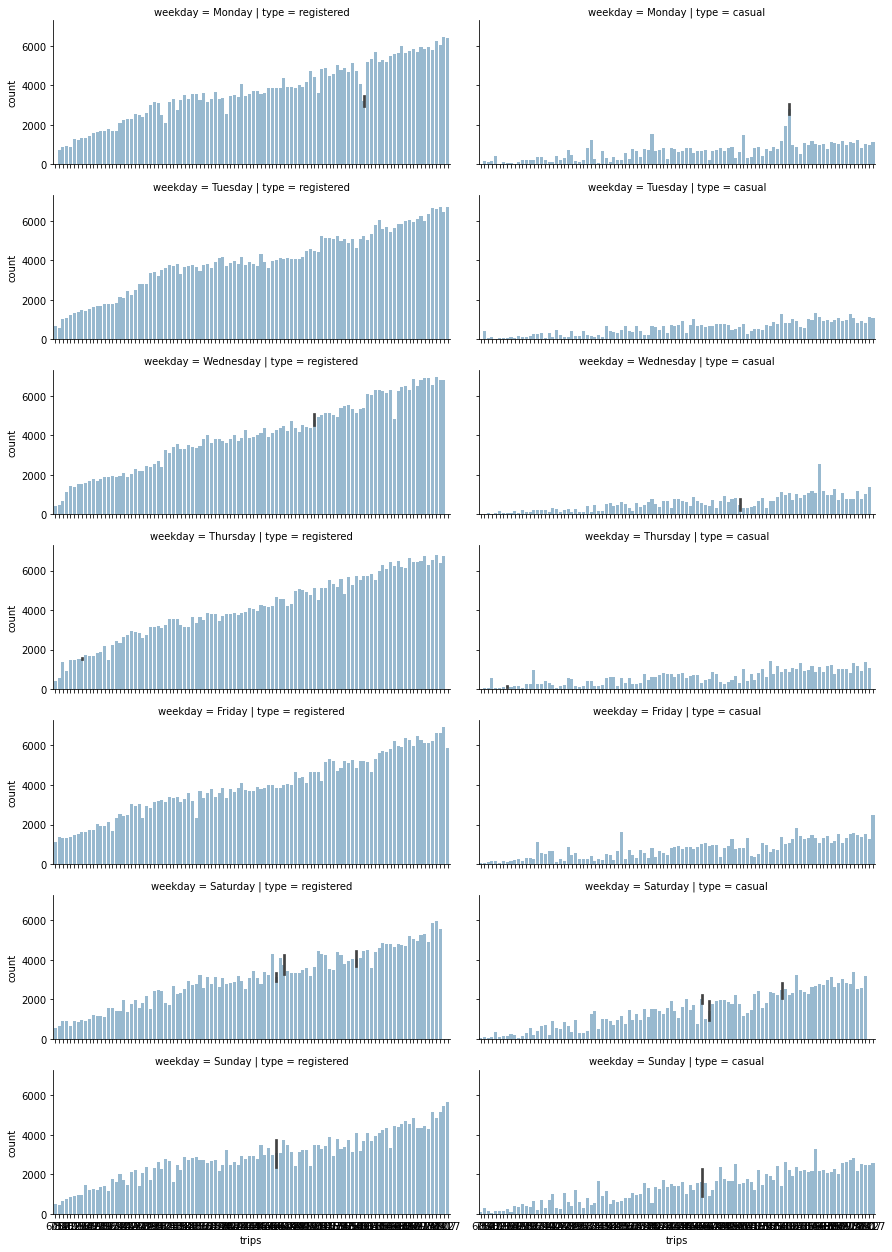

In [23]:
plot_data = data[['trips', 'weekday', 'registered', 'casual']]

plot_data = plot_data.melt(id_vars=['trips', 'weekday'], var_name='type', value_name='count')

grid = sns.FacetGrid(plot_data, row='weekday', col='type', height=2.5, aspect=2.5, \
row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

grid.map(sns.barplot, 'trips', 'count', alpha=0.5)

What are the daily travel trends for 2020? Are there any popular days we see a spike?

Does the weather affect the number of trip shares?

based on the results of the plot that we made, the correlation obtained from the attribute with -0.068 is "holiday" and "trips". The results obtained are below 1 or even minus which means that there is no effect of vacation on the total number of trips

are there popular days of the week that have higher or lower rideshare rides?


Based on the results of the plot it has been created that there are no popular days of the week that have higher or lower rideshare rides